In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def binomial_measure(multipliers, stages):

    intervals = np.array([0, 1])
    measures = np.array([1.0])

    m0, m1 = multipliers

    for _ in range(stages):
        new_intervals = []
        new_measures = []

        for idx in range(len(measures)):
            start, end = intervals[idx], intervals[idx + 1]
            midpoint = (start + end) / 2

            new_intervals.extend([start, midpoint])

            new_measures.extend([measures[idx] * m0, measures[idx] * m1])

        new_intervals.append(intervals[-1])

        intervals = np.array(new_intervals)
        measures = np.array(new_measures)

    return intervals, measures

multipliers = (0.6, 0.4)  # must sum to 1 cus its BINOMIAL
stages = 10

intervals, measures = binomial_measure(multipliers, stages)

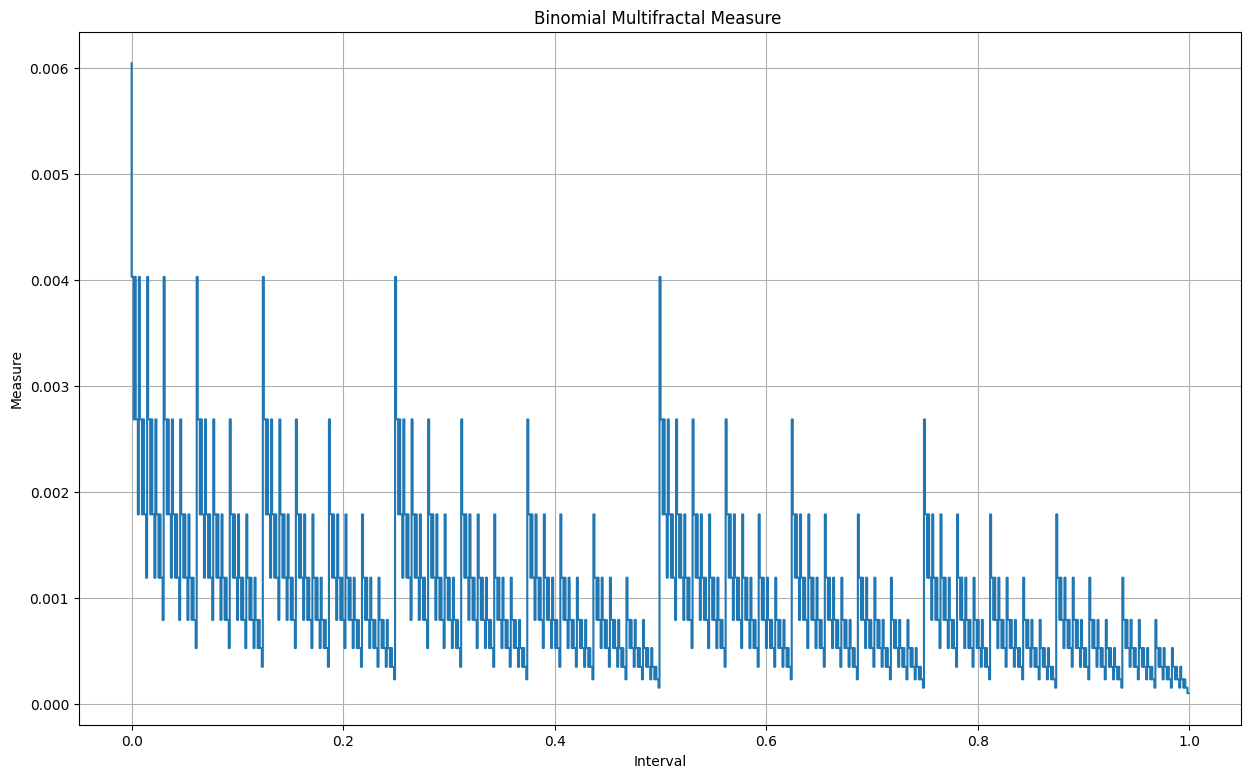

In [3]:
plt.figure(figsize=(15, 9))
plt.step(intervals[:-1], measures)
plt.title('Binomial Multifractal Measure ')
plt.xlabel('Interval')
plt.ylabel('Measure')
plt.grid(True)
plt.show()


In [4]:
def random_binomial_cascade(stages, a=2.0):
    intervals = np.array([0.0, 1.0])
    measures = np.array([1.0])

    for _ in range(stages):
        new_intervals = []
        new_measures = []
        for i in range(len(measures)):
            start = intervals[i]
            end = intervals[i+1]
            mid = (start + end) / 2.0

            # Draw a random multiplier for the left interval from Beta(a, a)
            m_left = np.random.beta(a, a)
            m_right = 1.0 - m_left
            new_intervals.extend([start, mid])
            new_measures.extend([measures[i] * m_left, measures[i] * m_right])
        new_intervals.append(intervals[-1])
        intervals = np.array(new_intervals)
        measures = np.array(new_measures)
    return intervals, measures


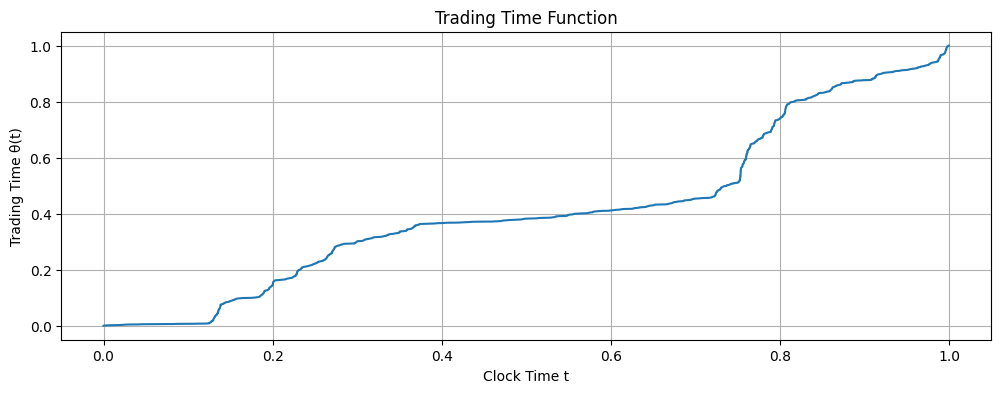

In [8]:
# Parameters for the cascade
stages = 15
a = 2.0

# Construct the random cascade
intervals, measures = random_binomial_cascade(stages, a)

cdf = np.concatenate(([0], np.cumsum(measures)))

plt.figure(figsize=(12, 4))
plt.step(intervals, cdf, where='post')
plt.xlabel('Clock Time t')
plt.ylabel('Trading Time θ(t)')
plt.title('Trading Time Function')
plt.grid(True)
plt.show()


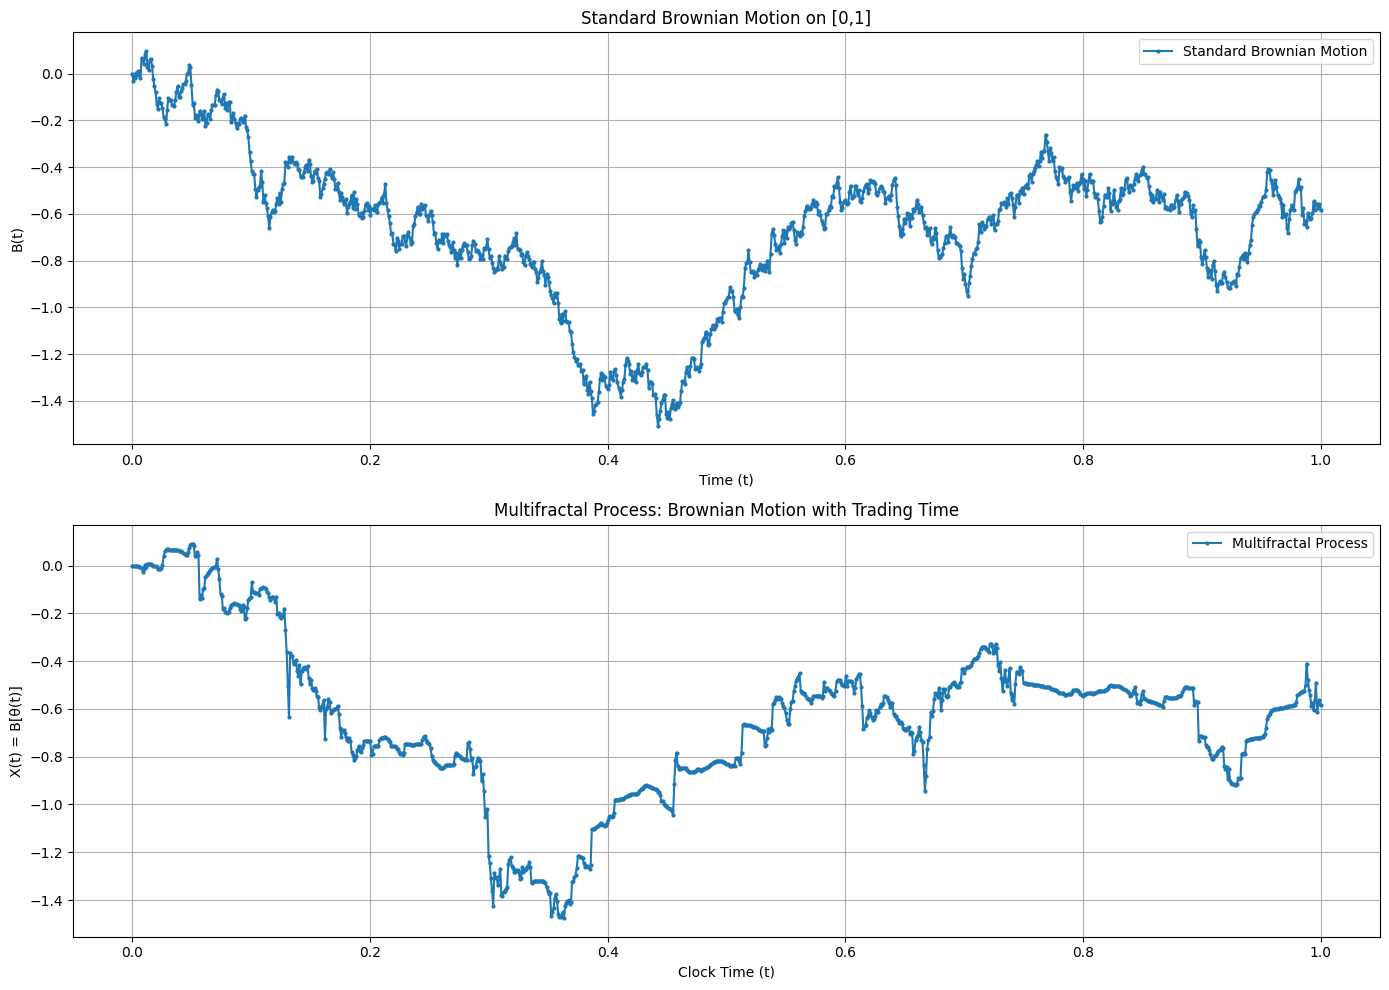

In [9]:
def random_binomial_cascade(stages, a=2.0):

    intervals = np.array([0.0, 1.0])
    measures = np.array([1.0])

    for _ in range(stages):
        new_intervals = []
        new_measures = []
        for i in range(len(measures)):
            start = intervals[i]
            end = intervals[i+1]
            mid = (start + end) / 2.0
            # Draw a random multiplier for the left subinterval
            m_left = np.random.beta(a, a)
            m_right = 1.0 - m_left
            new_intervals.extend([start, mid])
            new_measures.extend([measures[i] * m_left, measures[i] * m_right])
        new_intervals.append(intervals[-1])
        intervals = np.array(new_intervals)
        measures = np.array(new_measures)
    return intervals, measures

stages = 10
a = 2.0

intervals, measures = random_binomial_cascade(stages, a)

# The trading time function is CDF
cdf = np.concatenate(([0], np.cumsum(measures)))

# Simulate Brownian Motion
N_points = len(cdf)
t_uniform = np.linspace(0, 1, N_points)

# variance scaled by dt = 1/(N_points-1)
dB = np.random.normal(loc=0, scale=np.sqrt(1/(N_points - 1)), size=N_points - 1)
B = np.concatenate(([0], np.cumsum(dB)))

X = np.interp(cdf, t_uniform, B)
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(t_uniform, B, '-o', markersize=2, label='Standard Brownian Motion')
plt.xlabel('Time (t)')
plt.ylabel('B(t)')
plt.title('Standard Brownian Motion on [0,1]')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(intervals, X, '-o', markersize=2, label='Multifractal Process')
plt.xlabel('Clock Time (t)')
plt.ylabel('X(t) = B[θ(t)]')
plt.title('Multifractal Process: Brownian Motion with Trading Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()